# Realize HW03 question 2-2 with no Pytorch (nn1)

## import package

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## define parameter

In [11]:
# inputs
x = np.array([[-1., -1.],
              [-1.,  1.],
              [ 1., -1.],
              [ 1.,  1.]])
# desire output
Yd = np.array([[0.],
               [1.],
               [1.],
               [0.]])

# nn model 1
## hidden layer weight
wh = np.array([[0.2, -0.4],
              [0.2, -0.2]])

## hidden layer bias
bh = np.array([-0.8, 0.1])
## output layer weight wy
wy = np.array([0.1, -0.4])
## output layer bias by
by = -0.3

# learning rate
lr = 0.1


# epochs
epochs = 40000


## define Activation Function

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


## gradient of active function
#### ref: https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

In [13]:
def sigmoid_der(x):
    return x * (1 - x)


In [14]:
log = []
# training loop
for i in tqdm(range(epochs)):
    # forward pass
    zh = np.dot(x, wh) + bh
    ah = sigmoid(zh) # hidden_layer output
    zy = np.dot(ah, wy) + by
    y_pred = sigmoid(zy) # output
    y_pred = y_pred.reshape(Yd.shape)

    # error calculate
    error = Yd - y_pred
    ## MSE
    loss = np.mean(error**2) 
    log.append(loss.tolist())
    
    # backward pass
    delta = error * sigmoid_der(y_pred)
    delta_h = np.dot(delta, wy.reshape(1, 2)) * sigmoid_der(ah)
    
    # update weights and bias
    wy += lr * np.dot(ah.T, delta).reshape(wy.shape)
    by += lr * np.sum(delta, axis=0)
    wh += lr * np.dot(x.T, delta_h).reshape(wh.shape)
    bh += lr * np.sum(delta_h, axis=0)

100%|██████████| 40000/40000 [00:01<00:00, 23745.68it/s]


In [15]:
print(y_pred)

[[0.01876812]
 [0.97907962]
 [0.9790796 ]
 [0.01892352]]


## Plot the loss curve

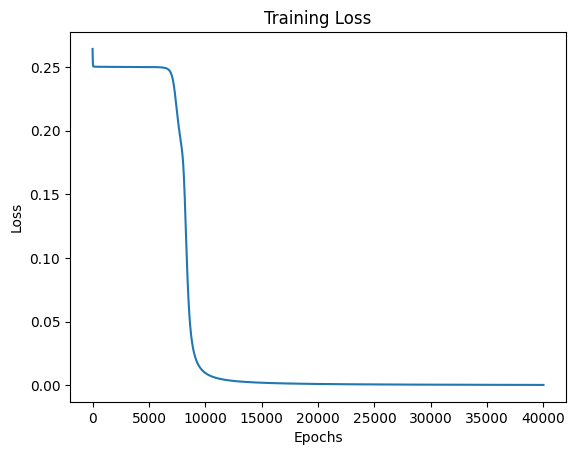

In [16]:
# plot loss curve with stride
plt.plot(np.array(log).flatten())
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()